$$B\rightarrow K^{*}\eta,          \eta\rightarrow\gamma\gamma$$

Text(0.5, 1.0, 'Selection Efficiency vs Maximum Transverse Energy for Two Photon Decay (2000 Events)')

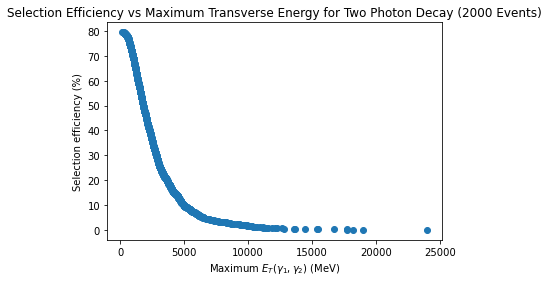

In [2]:
import uproot as ur
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

datafile = ur.open("./DVntuple4.root")

datafile.keys()
events = datafile['MCDecayTreeTuple/MCDecayTree;1']

gamma0_PT = events['gamma0_PT']
gamma1_PT = events['gamma_PT']

gamma0_PT = gamma0_PT.array(library="np")
gamma1_PT = gamma1_PT.array(library="np")

max_horiz_axis = [] # List to store the maximum transverse energy of each photon pair
min_horiz_axis = [] # List to store the maximum transverse momentum of each photon pair

for i in range(len(gamma0_PT)):
    max_horiz_axis.append(max(gamma0_PT[i], gamma1_PT[i]))
    min_horiz_axis.append(min(gamma0_PT[i], gamma1_PT[i]))

# Will be used as horizontal axis for corresponding plots
max_horiz_axis = np.array(max_horiz_axis)
min_horiz_axis = np.array(min_horiz_axis)

#Compute signal selection efficiency

max_ver_axis = []
for i in max_horiz_axis:
    counter = 0
    for j in range(len(gamma0_PT)):
        if ((gamma0_PT[j] > i) or (gamma1_PT[j] > i)):
            counter += 1
    max_ver_axis.append(counter)
        
max_ver_axis = np.array(max_ver_axis)
max_ver_axis = max_ver_axis/20

plt.scatter(max_horiz_axis, max_ver_axis)
plt.xlabel('Maximum $E_{T}(\gamma_{1}, \gamma_{2})$ (MeV)')
plt.ylabel('Selection efficiency (%)')
plt.title("Selection Efficiency vs Maximum Transverse Energy for Two Photon Decay (2000 Events)")

Text(0.5, 1.0, 'Selection Efficiency vs Minimum Transverse Energy for Two Photon Decay (2000 Events)')

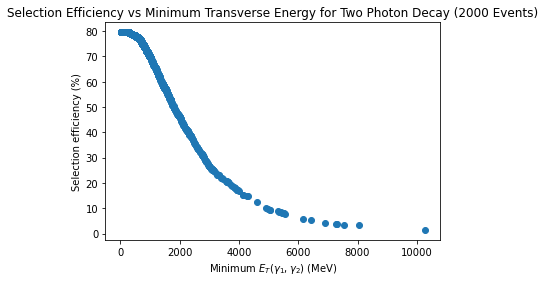

In [3]:
min_ver_axis = []
for i in min_horiz_axis:
    counter = 0
    for j in range(len(gamma0_PT)):
        if ((gamma0_PT[j] > i) or (gamma1_PT[j] > i)):
            counter += 1
    min_ver_axis.append(counter)
        
min_ver_axis = np.array(min_ver_axis)
min_ver_axis = min_ver_axis/20

plt.scatter(min_horiz_axis, min_ver_axis)
plt.xlabel('Minimum $E_{T}(\gamma_{1}, \gamma_{2})$ (MeV)')
plt.ylabel('Selection efficiency (%)')
plt.title("Selection Efficiency vs Minimum Transverse Energy for Two Photon Decay (2000 Events)")

$$B\rightarrow K^{*}\gamma$$

Text(0.5, 1.0, 'Selection Efficiency vs Photon Transverse Energy (in MeV) for 2000 Events')

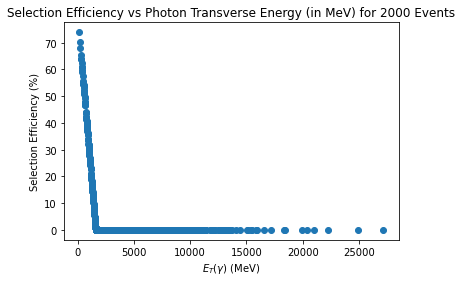

In [12]:
datafile2 = datafile = ur.open("./DVntuple2.root")
datafile2.keys()
events = datafile2['MCDecayTreeTuple/MCDecayTree;1']
gamma_PT = events['gamma_PT']
gamma_PT = gamma_PT.array(library="np")

ver_axis = []


for i in gamma_PT:
    counter = 0
    for j in range(len(gamma_PT)):
        if j > i:
            counter += 1
    ver_axis.append(counter)
ver_axis = np.array(ver_axis)
ver_axis = ver_axis/20
plt.scatter(gamma_PT, ver_axis)

plt.title()

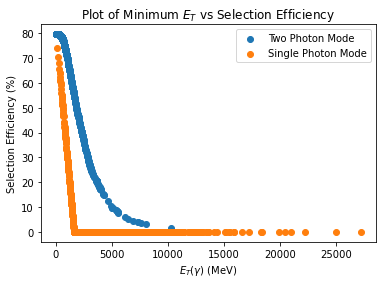

In [34]:
plt.figure()
plt.scatter(min_horiz_axis, min_ver_axis)
plt.scatter(gamma_PT, ver_axis)
plt.xlabel('$E_{T}(\gamma)$ (MeV)')
plt.ylabel('Selection Efficiency (%)')
plt.title("Plot of Minimum $E_{T}$ vs Selection Efficiency")
plt.legend(['Two Photon Mode', 'Single Photon Mode'])

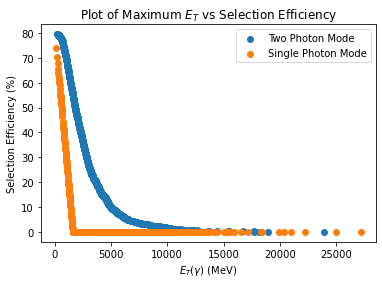

In [36]:
plt.figure()
plt.scatter(max_horiz_axis, max_ver_axis)
plt.scatter(gamma_PT, ver_axis)
plt.xlabel('$E_{T}(\gamma)$ (MeV)')
plt.ylabel('Selection Efficiency (%)')
plt.title("Plot of Maximum $E_{T}$ vs Selection Efficiency")
plt.legend(['Two Photon Mode', 'Single Photon Mode'])